In [1]:
import numpy as np
import numpy.random as rng

import sklearn
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set up small diabetes training data 
rng.seed(42)
diabetes_data = datasets.load_diabetes()
N = len(diabetes_data.target)
i = rng.randint(0,N-1,15)
X_train = diabetes_data.data[i,np.newaxis,2]
y_train = diabetes_data.target[i]

itest = np.setdiff1d( rng.randint(0,N-1,103), i)
Xtest = diabetes_data.data[itest,np.newaxis,2]
ytest = diabetes_data.target[itest]

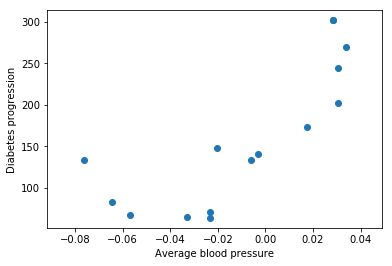

In [3]:
# Plot our training data
plt.scatter( X_train, y_train )
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');

Optimal parameters: 
slope: 1845.425
intercept: 177.089


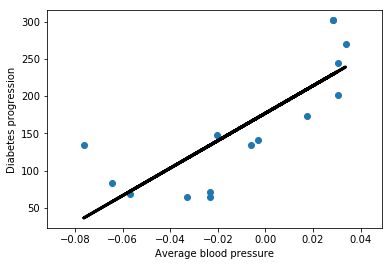

In [5]:
# A linear model
model = LinearRegression()

# Train the model using the training sets
# i.e., find parameters that make the model best fit the data
model.fit(X_train, y_train)

# What are the parameters we found to be best?
print('Optimal parameters: ')
print('slope: {:.3f}\nintercept: {:.3f}'.format(model.coef_[0], model.intercept_ ))

# Run the prediction
y_pred = model.predict(X_train)
model.score( X_train, y_train )

# plot the best fit line
plt.scatter( X_train, y_train )
plt.plot( X_train, y_pred, color='black', linewidth=3 )
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');

Optimal parameters: 
slope: 1845.425
intercept: 177.089


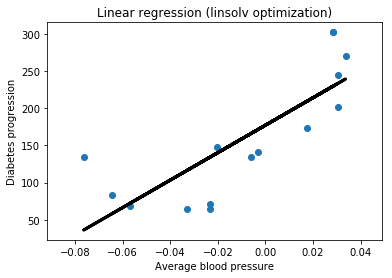

In [7]:
# Let's set up the problem ourselves
X1 = np.concatenate( (X_train, np.ones( (len(X_train),1) )), axis=1 ) # Check that this is correct in lab

theta,resid,rank,s = np.linalg.lstsq( X1, y_train ) # Note this is not explicitly computing the SVD
# What other solvers are there in np.linalg?
# https://docs.scipy.org/doc/numpy/reference/routines.linalg.html#solving-equations-and-inverting-matrices

y_linsolv_pred = np.matmul( X1, theta ); # Compare this to the previous output

print( 'Optimal parameters: ' )
print( 'slope: {:.3f}\nintercept: {:.3f}'.format(  theta[0], theta[1] ))

plt.scatter( X_train, y_train )
plt.plot( X_train, y_linsolv_pred, color='black', linewidth=3 )
plt.title("Linear regression (linsolv optimization)")
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');

R^2 Score: 0.865


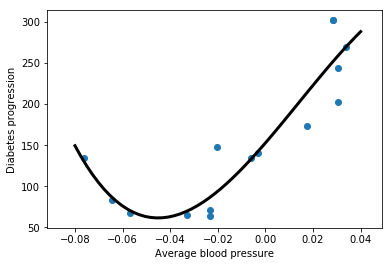

In [17]:
# Polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline(
    [('poly', PolynomialFeatures(degree=3)), 
     ('linear', LinearRegression())])

# Fit the model and 
poly_model.fit( X_train, y_train )

# print( 'Optimal parameters: ')
# print( ' '.join('{}'.format(c) for c in poly_model.named_steps['linear'].coef_))
print( 'R^2 Score: {0:.3f}'.format( poly_model.score(X_train,y_train)))

# Run the model for evenly spaced values of x for plotting
Xlin = np.reshape(np.linspace(-0.08,0.04),(-1,1))
y_poly_pred = poly_model.predict( Xlin )

# plot
plt.scatter( X_train, y_train )
plt.plot( Xlin, y_poly_pred, color='black', linewidth=3 )
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');

## Test time

Next, we collected more data from the same study.  Let's see how the model we trained performs on the new data.

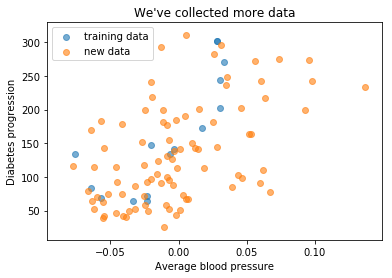

In [31]:
plt.scatter( X_train, y_train, alpha=0.6 )
plt.scatter( Xtest, ytest, alpha=0.6 )
plt.title("We've collected more data")
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');
plt.legend(['training data', 'new data'])

R^2 Score: -0.589


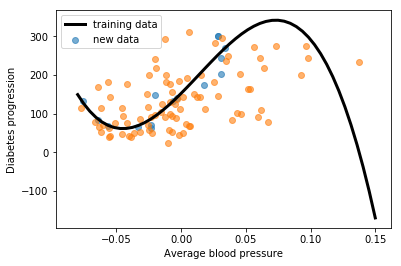

In [30]:
Xlin2 = np.reshape(np.linspace(-0.08,0.15),(-1,1))
y_poly_pred_test = poly_model.predict( Xlin2 )

print( 'R^2 Score: {0:.3f}'.format( poly_model.score(Xtest,ytest)))

plt.scatter( X_train, y_train, alpha=0.6 )
plt.scatter( Xtest, ytest, alpha=0.6 )
plt.plot( Xlin2, y_poly_pred_test, color='black', linewidth=3 )
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');
plt.legend(['training data', 'new data'])

R^2 Score: -0.367


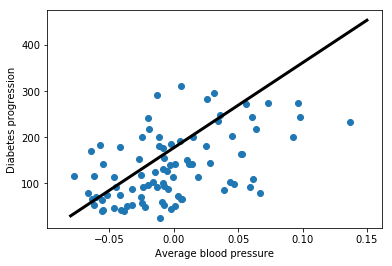

In [23]:
# Yeesh, let's fall back to our trusty old linear model

print( 'R^2 Score: {0:.3f}'.format( model.score( Xtest, ytest )))

Xlin2 = np.reshape(np.linspace(-0.08,0.15),(-1,1))
y_pred_test = model.predict( Xlin2 )

plt.scatter( Xtest, ytest )
plt.plot( Xlin2, y_pred_test, color='black', linewidth=3 )
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');

* **Hyper parameter**
    * Something you can change about your model / optimization that isn't optimized for
    * Often this is optimized for in an "outer loop" using cross validation 


* **Cross validation**
    * The process of testing performance on data independent of those that were used for training

In [24]:
# Set up training, validation, test splits

diabetes_data= datasets.load_diabetes()

N = len(diabetes_data.target)

# Training data (200 samples)
i_train = np.arange(0,200)
X_train_big = diabetes_data.data[i_train,np.newaxis,2]
y_train_big = diabetes_data.target[i_train]

# Validation data (100 samples)
i_validate = np.arange(201,300)
X_validate_big = diabetes_data.data[i_validate,np.newaxis,2]
y_validate_big = diabetes_data.target[i_validate]

# Test data (100 samples)
i_test = np.arange(301,400)
X_test_big = diabetes_data.data[i_test,np.newaxis,2]
y_test_big = diabetes_data.target[i_test]


In [25]:
pmList = []
for deg in range(1,5):
    pm = Pipeline(
        [('poly', PolynomialFeatures(degree=deg)), 
        ('linear', LinearRegression())])

    # Fit the model on the training set
    pm.fit( X_train_big, y_train_big )

    # Evaluate on the validation set
    print( 'degree {0:d} : score: {1:.3f}'.format( deg, pm.score(X_validate_big,y_validate_big)))
    pmList += [pm]

degree 1 : score: 0.385
degree 2 : score: 0.386
degree 3 : score: 0.386
degree 4 : score: 0.372


In [50]:
print( pmList[0].steps[0][1].degree )

1


In [52]:
for pm in pmList:
    print( pm.steps[0][1].degree)
    print( 'Optimal parameters for degree'
    print( ' '.join('{}'.format(k) for k in pm.named_steps['linear'].coef_ ))
    print( '' )

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])


TypeError: not all arguments converted during string formatting